# Bike Sharing Assignment

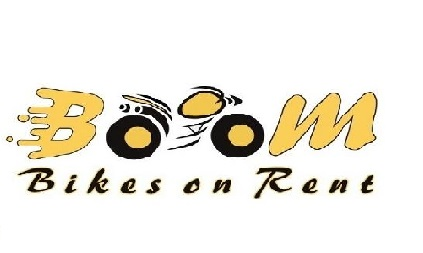










### Problem Statement

<font color= black>A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.</font>



### Business Goal:

<font color= black>You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.</font> 






# Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and visualization liabrarires to read understand the dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bbike = pd.read_csv("day.csv")

**Check the head of the dataset**


In [4]:
bbike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600



### "bbike"  have the following fields:
	
- **instant**: record index
- **dteday** : date
- **season** : season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr** : year (0: 2018, 1:2019)
- **mnth** : month ( 1 to 12)
- **holiday** : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit** : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** : temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **hum**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

## Inspect the various aspects of the dataframe

In [5]:
bbike.shape   #checking rows and columns 

(730, 16)

In [6]:
bbike.info()  # checking Null values and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bbike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

As we can see there are no Null values availabe

In [8]:
bbike.describe()  # numeric Summary 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning

### Dropinng few unwanted columns 

- we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion
- we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
- from the given data we can see that instant is an index column so we drop it

In [9]:
bbike.drop(['instant'],axis=1,inplace=True)
bbike.drop(['dteday'],axis=1,inplace=True)
bbike.drop(['casual','registered'],axis=1,inplace=True)

In [10]:
bbike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Imputations of variables with appropirate values 

<font color= black>from data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
</font>

In [11]:
#weathersit
bbike['weathersit']=bbike['weathersit'].apply(lambda x:str(x))
varlist=['weathersit']
bbike[varlist]=bbike[varlist].apply(lambda x:x.map({"1":"clear","2":"Mist","3":"Light snow","4":"Fog"}))

#season
bbike['season']=bbike['season'].apply(lambda x:str(x))
varlist1=['season']
bbike[varlist1]=bbike[varlist1].apply(lambda x:x.map({"1":"spring","2":"summer","3":"fall","4":"winter"}))


#Weekday
bbike['weekday']=bbike['weekday'].apply(lambda x:str(x))
varlist1=['weekday']
bbike[varlist1]=bbike[varlist1].apply(lambda x:x.map({"0":"Sunday","1":"Monday","2":"Tuesday","3":"Wednesday", "4":"Thursday","5":"Friday","6":"Saturday"}))




**Confirming**

In [12]:
print(bbike["season"].value_counts())
print("")
print(bbike["weathersit"].value_counts())
print("")
print(bbike["weekday"].value_counts())

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

clear         463
Mist          246
Light snow     21
Name: weathersit, dtype: int64

Monday       105
Tuesday      105
Thursday     104
Sunday       104
Saturday     104
Wednesday    104
Friday       104
Name: weekday, dtype: int64


In [13]:
bbike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Saturday,0,clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Sunday,0,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Monday,1,Mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Tuesday,1,clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Wednesday,1,clear,6.184153,7.54440,48.2917,14.958889,1321


In [14]:
bbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


# Step 2: Visualising the Data

<font color= black>Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.</font>

## Pairploting b/w Numeric Values

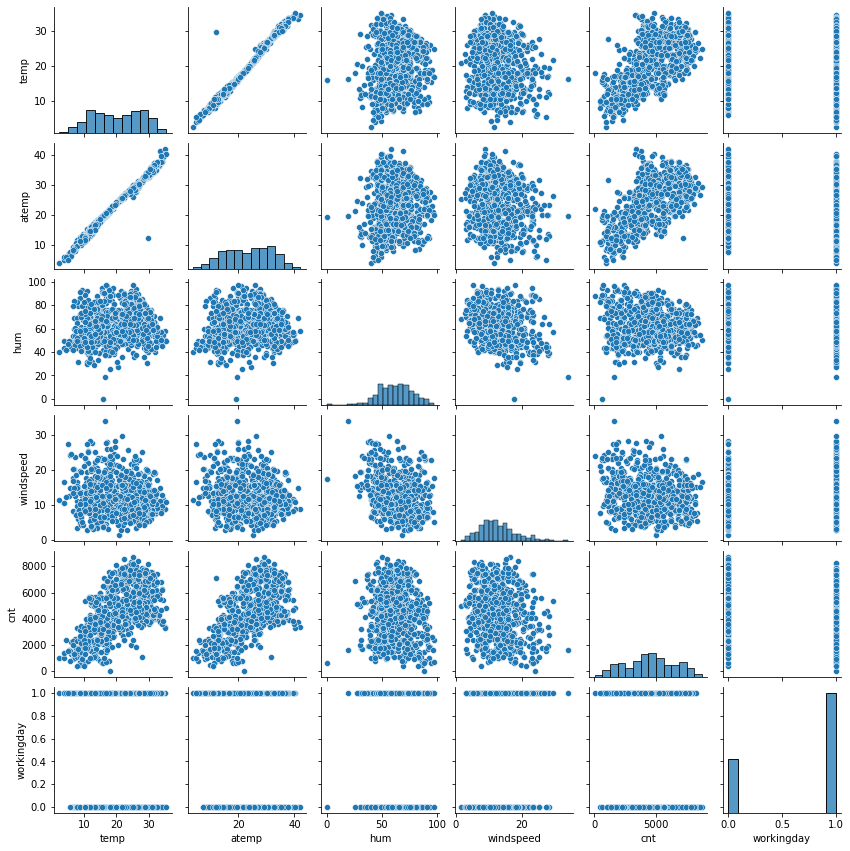

In [15]:
sns.pairplot(bbike, vars=['temp','atemp','hum','windspeed',"cnt","workingday"],aspect=1,size=2)
plt.show()

<font color= black>From above graphs we can say that temp and atemp have a relationship</font>

## Correlations Using Heatmap

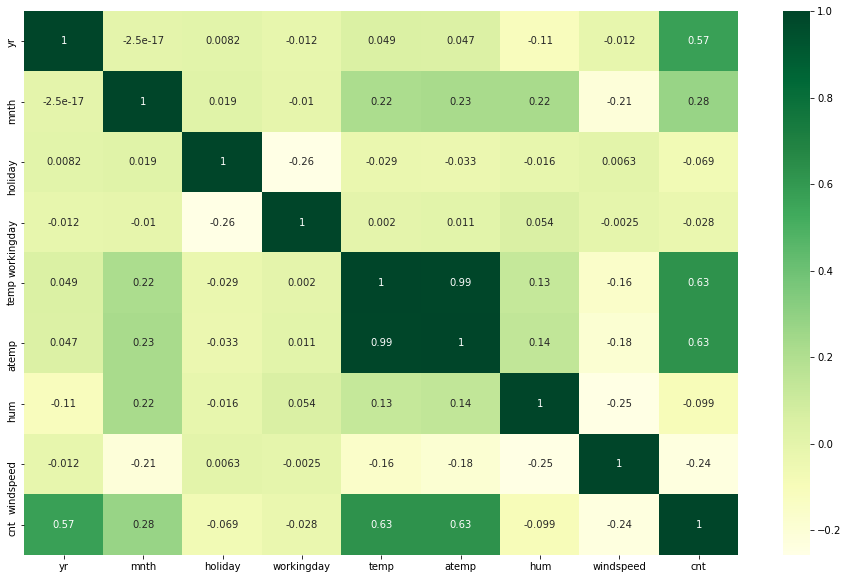

In [16]:
plt.figure(figsize = (16, 10))
sns.heatmap(bbike.corr(), annot = True, cmap="YlGn")
plt.show()

In [17]:
bbike=bbike.drop(["atemp"],axis=1)

<font color= black>correlation between temp and atemp is **`0.99`** which is almost 1.
will consider only one of them in our model building so dropping any one of them </font>

## Visualising categorical Variables to understand data better



## Checking Catogrical Columns 

In [18]:
# Confirming dtypes of above catogrical columns 

bbike["mnth"]=bbike.mnth.astype("object")
bbike['season']=bbike['season'].astype(object)
bbike['weathersit']=bbike['weathersit'].astype(object)
bbike['weekday']=bbike['weekday'].astype(object)
bbike['yr']=bbike['yr'].astype(object)
bbike['holiday']=bbike['holiday'].astype(object)
bbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 62.9+ KB


<AxesSubplot:xlabel='holiday', ylabel='cnt'>

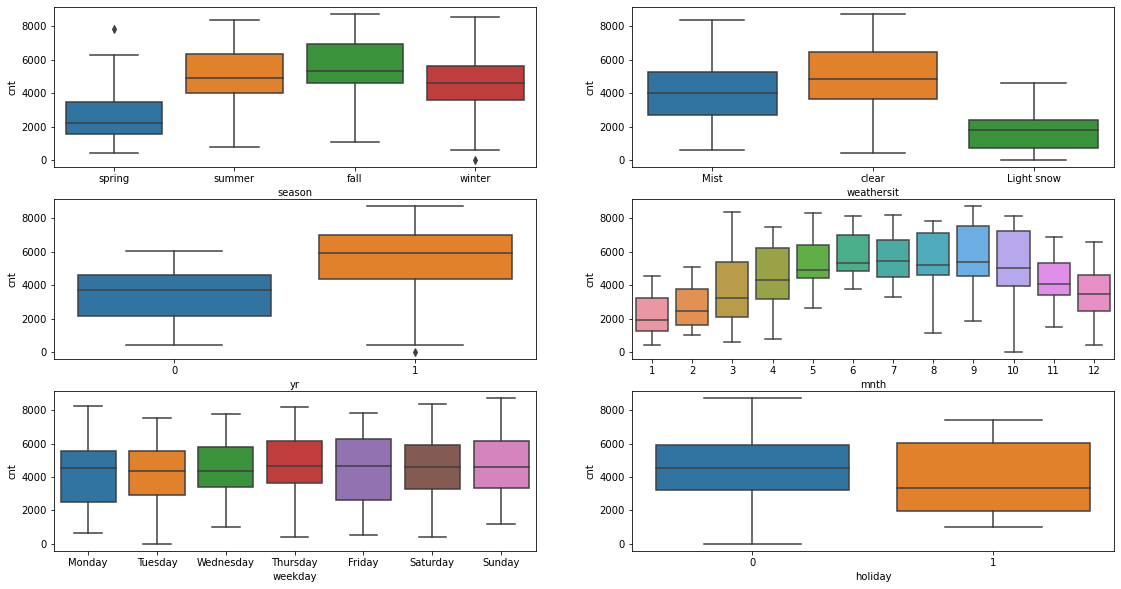

In [19]:
plt.figure(figsize=(19, 10))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bbike)
plt.subplot(3,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bbike)
plt.subplot(3,2,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bbike)
plt.subplot(3,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bbike)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bbike)
plt.subplot(3,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bbike)

<font color= black>So categorical data is related with cnt we can see that from above</font> 

In [20]:
bbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 62.9+ KB


## Creating Dummy variables for catogrical column having >2 levels

In [21]:
# #Creating dummy dataframes
type_season=pd.get_dummies(bbike['season'],drop_first=True)
weath_type=pd.get_dummies(bbike['weathersit'],drop_first=True)
day_type=pd.get_dummies(bbike['weekday'],drop_first=True)
Month=pd.get_dummies(bbike['mnth'],drop_first=True)

In [22]:
#Merging dataframes with main 

bbike=pd.concat([bbike,type_season],axis=1)
bbike=pd.concat([bbike,weath_type],axis=1)
bbike=pd.concat([bbike,day_type],axis=1)
bbike=pd.concat([bbike,Month],axis=1)

bbike.iloc[1:,11:]

,spring,summer,winter,Mist,clear,Monday,Saturday,Sunday,Thursday,Tuesday,...,3,4,5,6,7,8,9,10,11,12
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
726,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Deleting the orginal columns season.weathersit,weekday,mnth

In [23]:
bbike.drop(['season'],axis=1,inplace=True)
bbike.drop(['weathersit'],axis=1,inplace=True)
bbike.drop(['weekday'],axis=1,inplace=True)
bbike.drop(['mnth'],axis=1,inplace=True)

In [24]:
bbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    object 
 1   holiday     730 non-null    object 
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  Mist        730 non-null    uint8  
 11  clear       730 non-null    uint8  
 12  Monday      730 non-null    uint8  
 13  Saturday    730 non-null    uint8  
 14  Sunday      730 non-null    uint8  
 15  Thursday    730 non-null    uint8  
 16  Tuesday     730 non-null    uint8  
 17  Wednesday   730 non-null    uint8  
 18  2           730 non-null    uint8  
 19  3           730 non-null    u

In [25]:
bbike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
bbike.describe()

,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Mist,clear,...,3,4,5,6,7,8,9,10,11,12
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.690411,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.336986,0.634247,...,0.084932,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932
std,0.462641,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.473004,0.481971,...,0.278971,0.274845,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.278971
min,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 3: Splitting the Data into Training and Testing Sets

<font color= black>As you know, the first basic step for regression is performing a train-test split.</font>

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bbike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### Rescaling the Features 

<font color= black> Scaling doesn't impact your model.It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.</font>

### If we see temp,hum,atemp are all on diff scale so we need to do scaling
####  Min-Max Scaling
- <font color= black>there is no need of doing scaling of categorical data as they are already been converted to 0 and 1's 
- numerical data are yr( but this is already in 0 and 1 form),holiday(already in form of 0 and 1),workingday(already in form of 0 and 1).
- we need to scale temp,hum,windspeed,atemp,cnt,mnth,weekday.</font>

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
num_vars=['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    object 
 1   holiday     510 non-null    object 
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   cnt         510 non-null    float64
 7   spring      510 non-null    uint8  
 8   summer      510 non-null    uint8  
 9   winter      510 non-null    uint8  
 10  Mist        510 non-null    uint8  
 11  clear       510 non-null    uint8  
 12  Monday      510 non-null    uint8  
 13  Saturday    510 non-null    uint8  
 14  Sunday      510 non-null    uint8  
 15  Thursday    510 non-null    uint8  
 16  Tuesday     510 non-null    uint8  
 17  Wednesday   510 non-null    uint8  
 18  2           510 non-null    uint8  
 19  3           510 non-null    

In [33]:
df_train.describe()

,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Mist,clear,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.627451,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.483958,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df_test.describe()

,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Mist,clear,...,3,4,5,6,7,8,9,10,11,12
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.639269,20.815737,61.961883,12.600130,4546.981735,0.255708,0.264840,0.232877,0.319635,0.652968,...,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758
std,0.481313,7.689600,14.456669,4.984858,1898.633630,0.437258,0.442259,0.423633,0.467403,0.477117,...,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125
min,0.000000,3.957390,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.093750,51.166700,9.021282,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,20.807500,60.916700,12.167200,4579.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,27.401653,72.192050,15.395629,5869.500000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,34.815847,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step 4: Building a linear model

<font color= black>Fit a regression line through the training data using `sklearn` ,Using RFE approach for feature selection 
we start with 15 vars and will use mixed approach to build model</font>

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Selecting Top 15 features for model 

ln = LinearRegression()
ln.fit(X_train, y_train)

RFE = RFE(ln, 10)            
RFE = RFE.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,RFE.support_,RFE.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mist', True, 1),
 ('clear', True, 1),
 ('Monday', False, 13),
 ('Saturday', False, 10),
 ('Sunday', False, 11),
 ('Thursday', False, 19),
 ('Tuesday', False, 12),
 ('Wednesday', False, 18),
 (2, False, 14),
 (3, False, 5),
 (4, False, 7),
 (5, False, 6),
 (6, False, 8),
 (7, False, 15),
 (8, False, 2),
 (9, True, 1),
 (10, False, 3),
 (11, False, 16),
 (12, False, 17)]

In [39]:
top_10 = X_train.columns[RFE.support_]
top_10

Index([       'yr',   'holiday',      'temp',       'hum', 'windspeed',
          'summer',    'winter',      'Mist',     'clear',           9],
      dtype='object')

In [40]:
# Droping columns not firt for building model as per RFE 
X_train.columns[~RFE.support_]

Index(['workingday',     'spring',     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday',            2,            3,
                  4,            5,            6,            7,            8,
                 10,           11,           12],
      dtype='object')

In [41]:
X_train_RFE = X_train[top_10]

## Note:

<font color= black>Fit a regression line through the training data "X_train_RFE" using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.</font>

In [42]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_RFE)

In [43]:
ln =sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [44]:
ln.params   #cheking parameters (beta coeeficients)

const       -0.011029
yr           0.228914
holiday     -0.097964
temp         0.570606
hum         -0.173973
windspeed   -0.186706
summer       0.089525
winter       0.140200
Mist         0.184844
clear        0.236675
9            0.106731
dtype: float64

In [45]:
ln.summary()  #checking model summary 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 29 Mar 2021   Prob (F-statistic):          7.80e-190
Time:                        20:43:58   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0110      0.043     -0.255      0.799      -0.096       0.074
yr             0.2289      0.008     27.907      0.000       0.213       0.245
holiday       -0.0980      0.026     -3.787      0.000      -0.149      -0.047
temp           0.5706      0.020     28.206      0.000       0.531       0.610
hum           -0.1740      0.038     -4.594      0.000      -0.248      -0.100
windspeed     -0.1867      0.026     -7.207      0.000      -0.238      -0.136
summer         0.0895      0.010      8.719      0.000       0.069       0.110
winter         0.1402      0.010     13.386      0.000       0.120       0.161
Mist           0.1848      0.025      7.315      0.000       0.135       0.234
clear          0.2367      0.027      8.899      0.000       0.184       0.289
9              0.1067      0.016      6.793      0.000       0.076       0.138
==============================================================================
Omnibus:                       60.330   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.807
Skew:                          -0.668   Prob(JB):                     4.80e-28
Kurtosis:                       5.033   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Insight :

<font color= black>From above summary we can assume that all the variables are significant in nature and our R^2 and adjuted R^2  values are too close indicating  good results but still we dont 
have any idea about the multicollinearity of independent variables lets check that using VIF (variance inflation factor) for better results</font> 

# Step 5:  Model building and Feature Selection  using VIF 

In [46]:
# Importing VIF from Sklearn 

from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()

X = X_train_RFE.astype(float)                                    

VIF['Features'] = X.columns                                       

VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

VIF['VIF'] = round(VIF['VIF'], 2)

VIF = VIF.sort_values(by = "VIF", ascending = False)

VIF


,Features,VIF
3,hum,17.81
8,clear,9.73
2,temp,8.42
7,Mist,7.31
4,windspeed,4.12
0,yr,2.06
6,winter,1.66
5,summer,1.58
9,9,1.21
1,holiday,1.04


## Insight 

- <font color= black>Column "hum" has very high significance which is good indication but it has also high VIF which is not good that means its   higly correlated to other indipendent variables , so we have to drop it as it causing multicollinearity not good for our model</font>

## Model 1

**Droping "hum"**

In [47]:
X_train_RFE=X_train_RFE.drop(['hum'],axis=1)



print("Summary after dropping 'hum'")


print("")
print("")


X_train_lm = sm.add_constant(X_train_RFE)
ln1 = sm.OLS(y_train,X_train_lm.astype(float)).fit()  
print(ln1.summary())


print("")
print("")

print("VIF after dropping 'hum'")

print("")
print("")


VIF = pd.DataFrame()
X = X_train_RFE.astype(float)                                     
VIF['Features'] = X.columns                                       
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
print(VIF)

Summary after dropping 'hum'


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Mon, 29 Mar 2021   Prob (F-statistic):          1.37e-186
Time:                        20:43:58   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1574

## Model 2

**Droping "clear"**

In [48]:
X_train_RFE=X_train_RFE.drop(['clear'],axis=1)



print("Summary after dropping 'clear'")


print("")
print("")


X_train_lm = sm.add_constant(X_train_RFE)
ln2 = sm.OLS(y_train,X_train_lm.astype(float)).fit()  
print(ln2.summary())


print("")
print("")

print("VIF after dropping 'clear'")

print("")
print("")


VIF = pd.DataFrame()
X = X_train_RFE.astype(float)                                     
VIF['Features'] = X.columns                                       
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
print(VIF)

Summary after dropping 'clear'


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 29 Mar 2021   Prob (F-statistic):          5.28e-163
Time:                        20:43:58   Log-Likelihood:                 433.22
No. Observations:                 510   AIC:                            -848.4
Df Residuals:                     501   BIC:                            -810.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.12

# Final Conclusion :

- <font color= black> So, all VIF's are under 5 and PIF values <0.05 so this model is fine </font>
                                                                   
- <font color= black>We have considered all columns and checked.Now we stop the model building and check on which model can we choose
  model 2(ln2) seems to give good result so we choose it.</font>

# Step 6 : Residual Analysis of the train data

<font color= black>So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.</font>

In [49]:
y_train_pred = ln2.predict(X_train_lm)

res=y_train - y_train_pred

Text(0.5, 0, 'Errors')

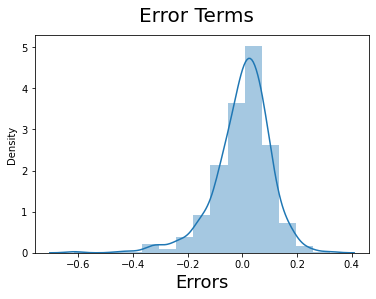

In [50]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Looking for patterns in the residuals

The residuals are following the normally distributed with a mean 0. All good!

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final 10th model 

#### Applying the scaling on the test sets

In [51]:
num_vars=['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [52]:
df_test.describe()

,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Mist,clear,...,3,4,5,6,7,8,9,10,11,12
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.319635,0.652968,...,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758
std,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.467403,0.477117,...,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125
min,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

#### Adding constant variable to test dataframe


In [54]:
X_train_lm = X_train_lm.drop(['const'], axis=1)         # droping constant from training data set  


X_test_RFE= X_test[X_train_lm.columns]                  # Adding all significant columns to test data set 



X_test_lm=sm.add_constant(X_test_RFE)                   #adding constant to test dat dset 


In [55]:
y_test_pred = ln2.predict(X_test_lm)

In [56]:
y_test_pred.head()

184    0.412908
535    0.915824
299    0.393573
221    0.545739
152    0.561322
dtype: object

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [58]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.1047379804093529

###### Checking the R-squared on the test set

In [59]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7690313110260333

In [60]:
# Cheking Size of train data set 
res=y_train - y_train_pred
print(X_train_lm.shape)
print(res.shape)

(510, 8)
(510,)


#### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

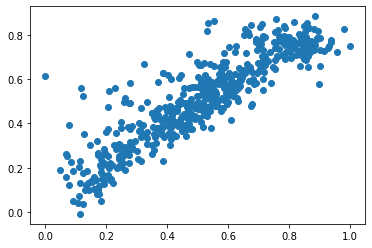

In [61]:
plt.scatter(y_train,y_train_pred)                             #Train data 
plt.show()

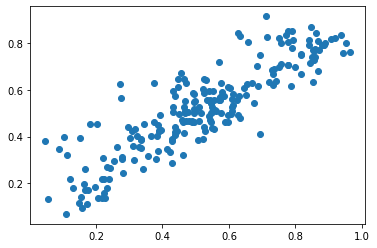

In [62]:
plt.scatter(y_test,y_test_pred)                               #Test data
plt.show()

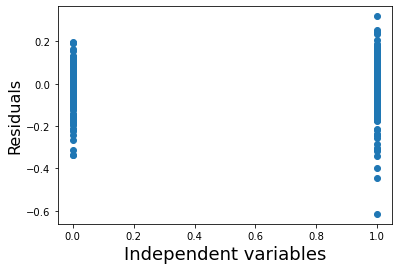

In [63]:
X=X_train_lm.iloc[:,0].values
    
    
plt.scatter(X,res)
fig.suptitle('Independent vars vs res', fontsize=20)               
plt.xlabel('Independent variables', fontsize=18)                     
plt.ylabel('Residuals', fontsize=16)  
plt.show()


#### When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [64]:
ln2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 29 Mar 2021   Prob (F-statistic):          5.28e-163
Time:                        20:43:59   Log-Likelihood:                 433.22
No. Observations:                 510   AIC:                            -848.4
Df Residuals:                     501   BIC:                            -810.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1228      0.019      6.538      0.000       0.086       0.160
yr             0.2385      0.009     25.634      0.000       0.220       0.257
holiday       -0.0854      0.030     -2.893      0.004      -0.143      -0.027
temp           0.5498      0.022     24.521      0.000       0.506       0.594
windspeed     -0.1818      0.028     -6.431      0.000      -0.237      -0.126
summer         0.0869      0.012      7.423      0.000       0.064       0.110
winter         0.1165      0.012     10.010      0.000       0.094       0.139
Mist          -0.0665      0.010     -6.750      0.000      -0.086      -0.047
9              0.0908      0.018      5.082      0.000       0.056       0.126
==============================================================================
Omnibus:                      130.142   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.359
Skew:                          -1.169   Prob(JB):                     2.61e-93
Kurtosis:                       6.820   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
round(ln2.params,4)

const        0.1228
yr           0.2385
holiday     -0.0854
temp         0.5498
windspeed   -0.1818
summer       0.0869
winter       0.1165
Mist        -0.0665
9            0.0908
dtype: float64

# We can see that the equation for best fitted line is:




- <font color =  green> $ demand = 0.2385  \times  yr -0.0854  \times  holiday + 0.5498 \times temp - 0.1818 \times windspeed - 0.0665 \times Mist  + 0.0869 \times summer + 0.1165 \times winter + 0.0908 \times 9 $</font>
